In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
plt.style.use('ggplot')
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit

Using TensorFlow backend.


Because I will be doing several of the same figures with similar OECD data from the world bank, I'm going to write some functions. I could make these better but they'll do what I want for now. 

In [2]:
oecd = ['Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'United States']

def read_wb_data(path, OECD):
    wb =pd.read_csv(str(path))
    wb = wb.transpose()
    wb.columns = wb.iloc[0]
    wb = wb.iloc[4:]
    wb =  wb.rename(columns = {'Korea, Rep.':'South Korea'})
    if OECD == True:
        wb = wb[oecd]
        wb= wb.dropna()


    return wb


In [3]:
def oecd_graph(wb, bottom_year, top_Year, title):
    wb['year']= range(bottom_year, top_Year + 1)
    fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(20, 20))
    fig.subplots_adjust(hspace=1)
    fig.suptitle(t = str(title), fontsize = 'xx-large' )


    for ax, country in zip(axes.flatten(),oecd):
        ax.plot('year',  country, data= wb, color = 'blue')
        ax.set(title= country, xlabel='Year')
    return plt.show()

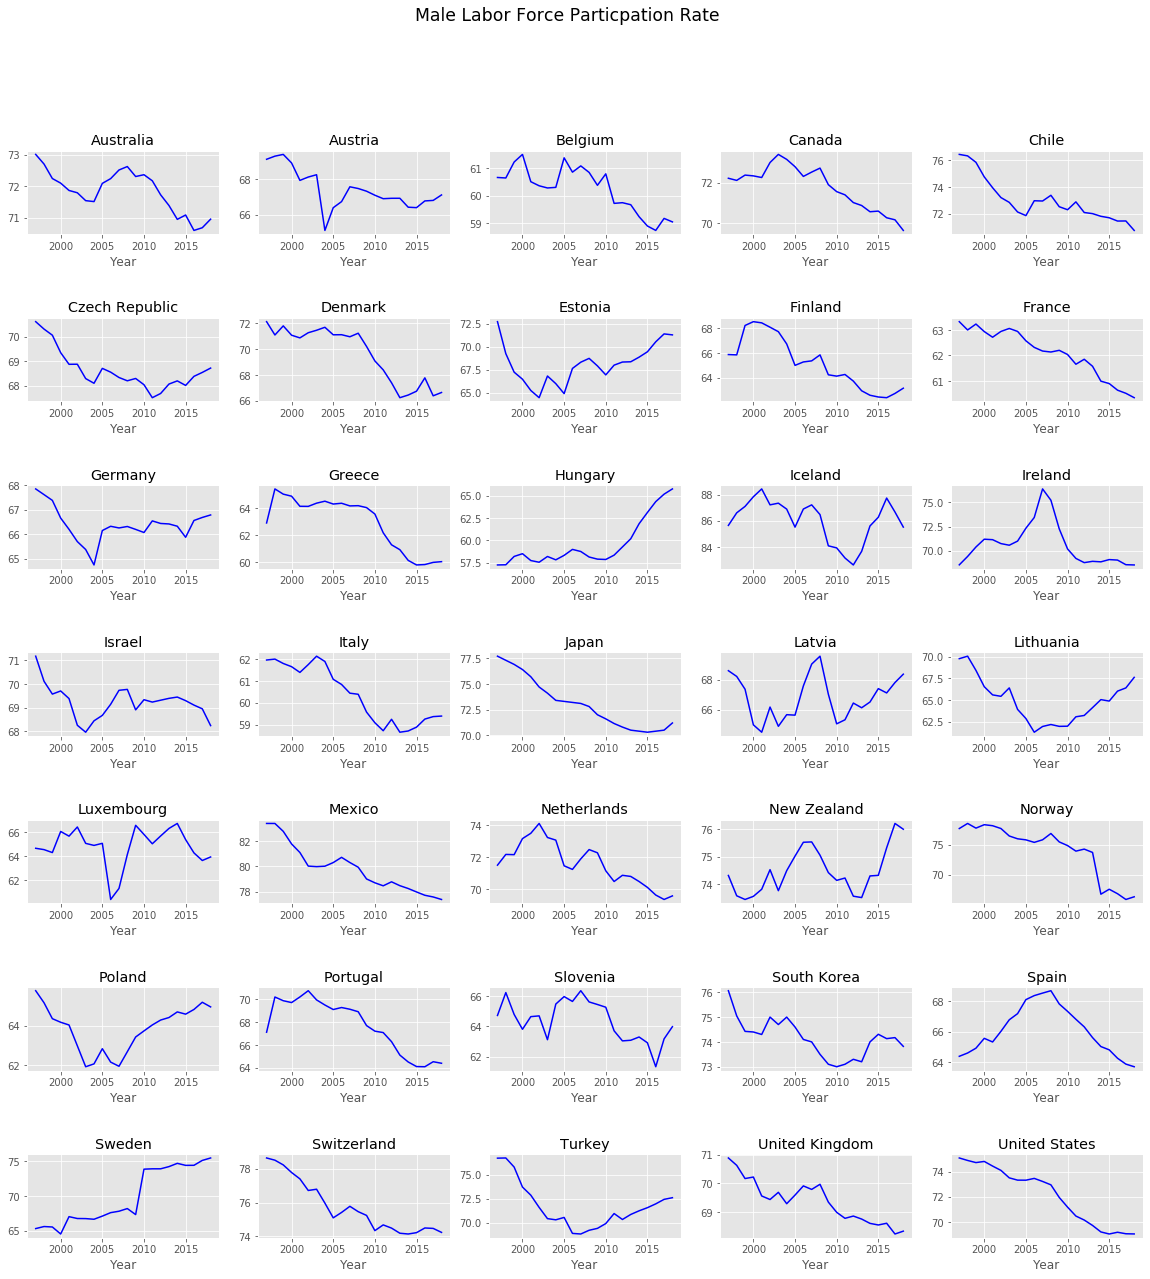

In [27]:
mlf= read_wb_data('/Users/chase/Downloads/API_SL-2/API_SL.TLF.CACT.MA.NE.ZS_DS2_en_csv_v2_718555.csv', True)
oecd_graph(mlf,1997, 2018,"Male Labor Force Particpation Rate")

In [0]:
age = read_wb_data("/Users/chase/Downloads/API_SP/API_SP.POP.65UP.TO.ZS_DS2_en_csv_v2_718240.csv", True)
oecd_graph(age,1960, 2018, "Percentage of Population over 65")

In [0]:
lf = read_wb_data("/Users/chase/Downloads/API_SL/API_SL.TLF.CACT.ZS_DS2_en_csv_v2_712996.csv" , True )
oecd_graph(lf, 1990,2019, "Labor Force Particpation Rate ")

In [0]:
flf = read_wb_data("/Users/chase/Downloads/API_SL-3/API_SL.TLF.CACT.FE.ZS_DS2_en_csv_v2_713147.csv", True)
oecd_graph(flf, 1990,2019, "Female Labor Force Particpation Rate ")

Okay, here I start looking at trends of labor force particaption rates by country. First I import the data and prepare it to be graphed. 

In [4]:
male_youth_unemploy = read_wb_data('/Users/chase/Downloads/API_SL-5/API_SL.UEM.1524.MA.ZS_DS2_en_csv_v2_718577.csv', True)

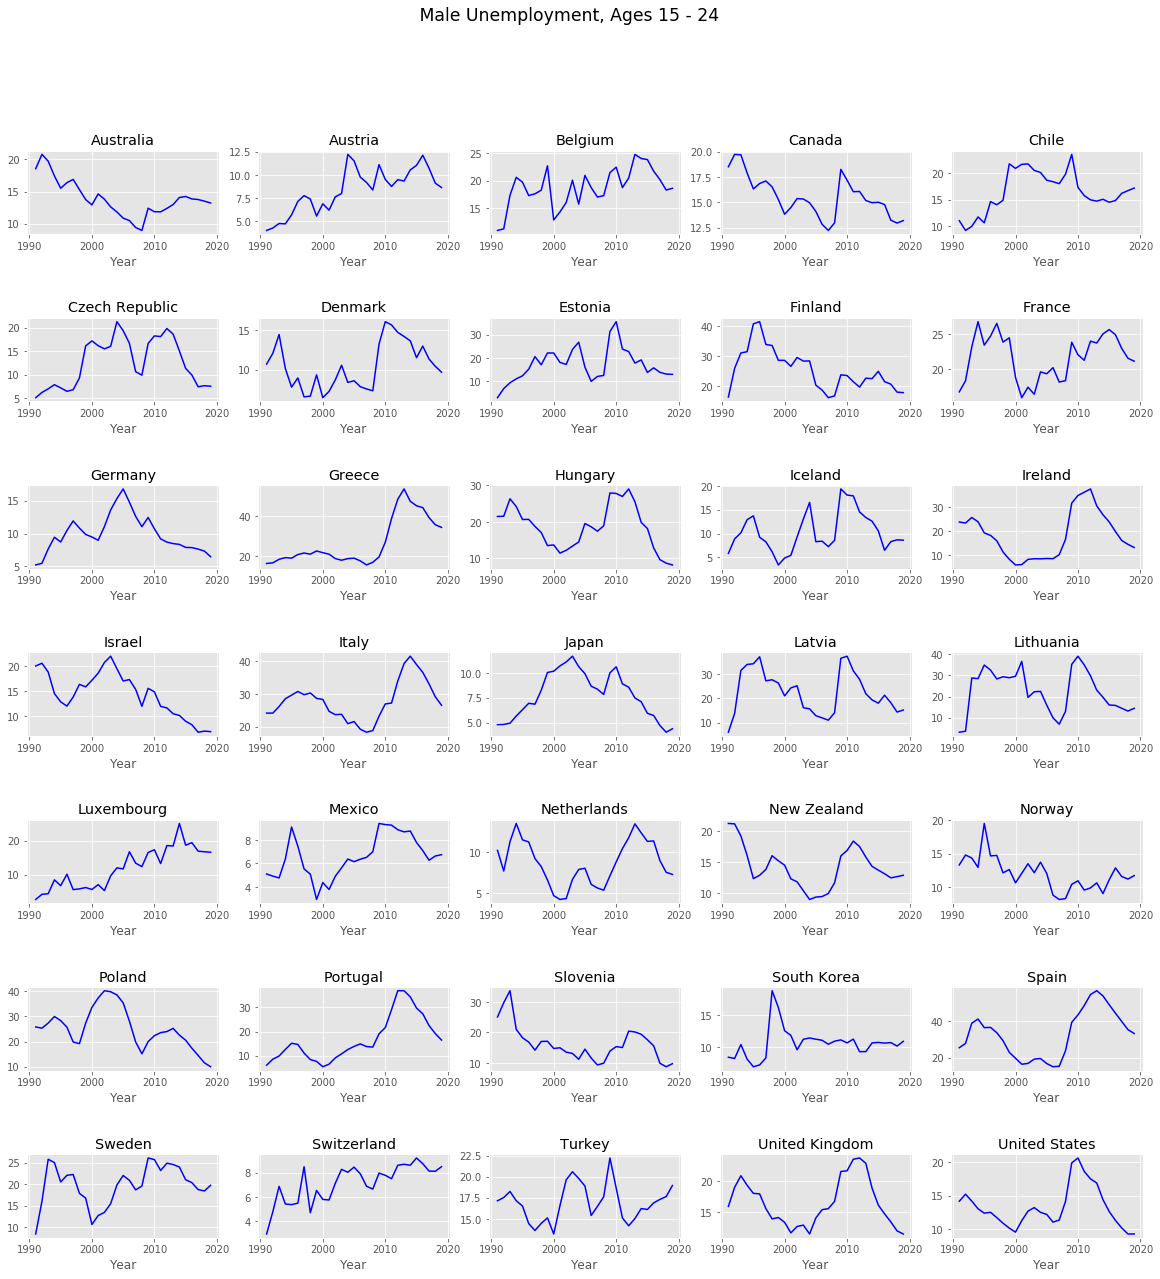

In [5]:
oecd_graph(male_youth_unemploy, 1991,2019,' Male Unemployment, Ages 15 - 24')

In [0]:
Dmale_youth_unemploy = male_youth_unemploy.diff(1)
Dmale_youth_unemploy = Dmale_youth_unemploy.dropna()

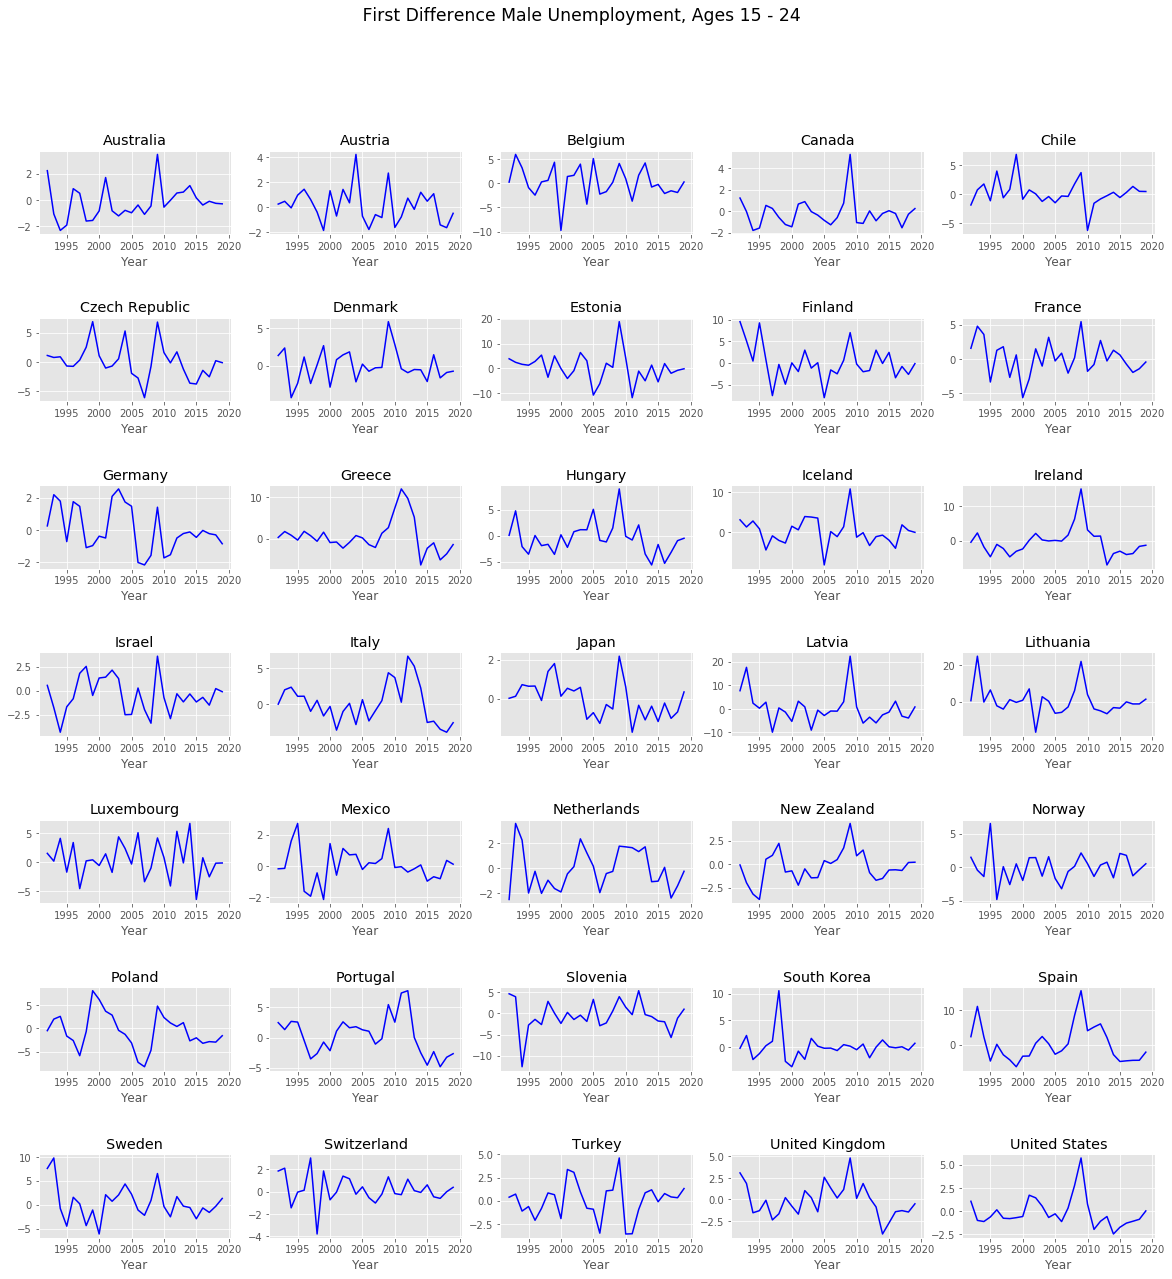

In [40]:
oecd_graph(Dmale_youth_unemploy, 1992,2019,' First Difference Male Unemployment, Ages 15 - 24')

In [0]:
# from statsmodels.graphics.tsaplots import plot_acf
# from statsmodels.graphics.tsaplots import plot_pacf

# for country in oecd:
#    x = male_youth_unemploy[country]
#    plot_acf(x)

In [46]:
import statsmodels.api as sm
def decomp(data):
    data.index = pd.to_datetime(data.index)
    addititve_decompostion = sm.tsa.seasonal_decompose(data, model = 'additive')
    return addititve_decompostion


In [1]:
def printa(x,y):
    for char in x:
        for num in y:
            print(char,num)
        return

In [ ]:
printa(['a',])